In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [115]:
df=pd.read_csv('FakeNewsNet.csv')
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [116]:
df.isnull().sum().sort_values(ascending=False)

news_url         330
source_domain    330
title              0
tweet_num          0
real               0
dtype: int64

In [117]:
df=df.dropna()

In [118]:
df.isnull().sum().sort_values(ascending=False)

title            0
news_url         0
source_domain    0
tweet_num        0
real             0
dtype: int64

In [119]:
df.head()

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [120]:
X=df.drop('real',axis=1)
y=df['real']

In [121]:
X.head()

,title,news_url,source_domain,tweet_num
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38


In [122]:
import tensorflow as tf
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM,Dense,Embedding
from tensorflow.keras.preprocessing.text import one_hot


In [123]:
voc_size=5000

In [124]:
messages=X.copy()
messages['title'][0]

"Kandi Burruss Explodes Over Rape Accusation on 'Real Housewives of Atlanta' Reunion (Video)"

In [125]:
# messages.reset_index(inplace=True)

In [126]:
messages

,title,news_url,source_domain,tweet_num
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38
...,...,...,...,...
23191,Pippa Middleton wedding: In case you missed it...,https://www.express.co.uk/news/royal/807049/pi...,www.express.co.uk,52
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,hollywoodlife.com/2018/03/13/zayn-malik-gigi-h...,hollywoodlife.com,7
23193,Jessica Chastain Recalls the Moment Her Mother...,http://www.justjared.com/2018/01/17/jessica-ch...,www.justjared.com,26
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",www.intouchweekly.com/posts/tristan-thompson-f...,www.intouchweekly.com,24


In [127]:
import nltk
import re
from nltk.corpus import stopwords

In [128]:
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'].iloc[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [129]:
corpus

['kandi burruss explod rape accus real housew atlanta reunion video',
 'peopl choic award best red carpet look',
 'sophia bush send sweet birthday messag one tree hill co star hilari burton breyton eva',
 'colombian singer maluma spark rumour inappropri relationship aunt',
 'gossip girl year later upper east sider shock world chang pop cultur forev',
 'gwen stefani got dump blake shelton jealousi drama exclus',
 'broward counti sheriff fire lie parkland',
 'amber rose shut french montana date rumor call rapper bruvaaa',
 'mindi kale make first post babi appear disneyland wrinkl time co star',
 'katharin mcphee butcher toni nomin drink',
 'wag miami star ashley nicol robert philip wheeler marri',
 'mel gibson hollywood pedophil nowher left hide',
 'medium tyler henri address chill messag kristin cavallari deceas brother express read',
 'dwt season result week disney night',
 'reason tarek el moussa overcom latest back injuri',
 'david cassidi cut estrang daughter kati complet leav son b

In [130]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[3840, 3092, 555, 73, 1474, 2503, 3940, 2000, 1422, 127],
 [4662, 3726, 3823, 1701, 4222, 2764, 2408],
 [4830,
  2973,
  2049,
  4988,
  573,
  2678,
  1396,
  3615,
  1847,
  3670,
  2125,
  706,
  4623,
  630,
  429],
 [283, 303, 938, 1740, 4640, 2852, 4882, 2466],
 [4120, 3318, 2907, 1053, 2195, 2145, 2294, 625, 401, 357, 1420, 4919, 4924],
 [558, 3445, 2761, 4300, 705, 4724, 2729, 2872, 2122],
 [2674, 1549, 1283, 2110, 143, 3915],
 [3133, 480, 2467, 4222, 1107, 4561, 3391, 2646, 4514, 124],
 [4354, 1730, 3793, 360, 1936, 2546, 1177, 4431, 1865, 299, 3670, 2125],
 [4593, 543, 2802, 3670, 248, 374],
 [4476, 2406, 2125, 2127, 4173, 4573, 4885, 4945, 2030],
 [4145, 4586, 2529, 1504, 2107, 31, 1792],
 [1011, 329, 4524, 4551, 1015, 2678, 2227, 2357, 1388, 1481, 1519, 2493],
 [3820, 2449, 3155, 2000, 1815, 561],
 [2368, 3326, 1285, 3001, 4087, 2660, 3044, 1404],
 [1002, 3511, 91, 2794, 4412, 3726, 3907, 2960, 3049, 1928],
 [4514, 2312, 3602, 4084, 2340, 1782, 2410],
 [2094, 2363, 3000, 3

In [131]:
corpus[1]

'peopl choic award best red carpet look'

In [132]:
onehot_repr[1]

[4662, 3726, 3823, 1701, 4222, 2764, 2408]

In [133]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[3840 3092  555 ...    0    0    0]
 [4662 3726 3823 ...    0    0    0]
 [4830 2973 2049 ...    0    0    0]
 ...
 [  60 3625 3974 ...    0    0    0]
 [4145 2279  746 ...    0    0    0]
 [3811 4626 1325 ...    0    0    0]]


In [134]:
embedded_docs[1]

array([4662, 3726, 3823, 1701, 4222, 2764, 2408,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0])

In [135]:
embedding_vector_features=40 #features representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [136]:
X_final = np.array(embedded_docs)  #  padded integer sequences
y_final = np.array(y)              # labels (0/1)


In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.33, random_state=42
)


In [138]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

In [139]:
class_weights_dict = dict(enumerate(class_weights))


In [140]:
from keras.layers import Embedding, LSTM, Dense, Dropout

embedding_vector_features = 40

model = Sequential()
model.add(Embedding(input_dim=voc_size, 
                    output_dim=embedding_vector_features, 
                    input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))

In [141]:
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [142]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_test, y_test),
    epochs=10, 
    batch_size=64,
    class_weight=class_weights_dict 
)


Epoch 1/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6709 - loss: 0.5795 - val_accuracy: 0.7501 - val_loss: 0.5309
Epoch 2/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8030 - loss: 0.4379 - val_accuracy: 0.7409 - val_loss: 0.5154
Epoch 3/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8193 - loss: 0.3929 - val_accuracy: 0.7886 - val_loss: 0.4547
Epoch 4/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8302 - loss: 0.3648 - val_accuracy: 0.7421 - val_loss: 0.5149
Epoch 5/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8358 - loss: 0.3487 - val_accuracy: 0.7750 - val_loss: 0.4757
Epoch 6/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8443 - loss: 0.3260 - val_accuracy: 0.7416 - val_loss: 0.5502
Epoch 7/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8497 - loss: 0.3121 - val_accuracy: 0.7645 - val_loss: 0.5062
Epoch 8/15
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8595 - loss: 0.2867 - val_accu

In [143]:
y_pred_prob = model.predict(X_test)
threshold = 0.3  # adjust based on ROC-AUC
y_pred = np.where(y_pred_prob > threshold, 1, 0)

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [144]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.7790882586800955

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.68      0.60      1842
           1       0.89      0.81      0.85      5704

    accuracy                           0.78      7546
   macro avg       0.71      0.74      0.72      7546
weighted avg       0.80      0.78      0.79      7546



<Axes: >

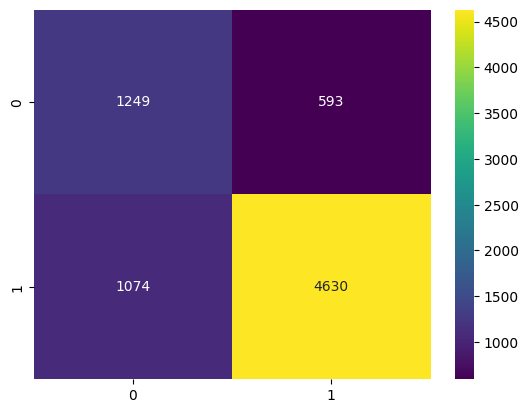

In [145]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf,fmt= 'd',annot=True,cmap='viridis')